In [1]:
# !pip install nltk
# !pip install wordcloud
# !pip install pandas
# !pip install seaborn
# !pip install sklearn

# Importing libraries

In [2]:
import pandas as pd
import numpy as np
from os import path
import time
import calendar
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline


from wordcloud import WordCloud, STOPWORDS

#NLTK
from nltk import ngrams
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

#Feature Extraction
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

#Model Training
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score


# Importing CSV files

In [3]:
train_df = pd.read_csv("project_training_data_with_class_labels.csv", error_bad_lines=False)

/tmp/ipykernel_4136944/2147414233.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  train_df = pd.read_csv("project_training_data_with_class_labels.csv", error_bad_lines=False)
Skipping line 36926: expected 4 fields, saw 5
Skipping line 72352: expected 4 fields, saw 5
Skipping line 104352: expected 4 fields, saw 5

Skipping line 202373: expected 4 fields, saw 5
Skipping line 207923: expected 4 fields, saw 5

Skipping line 309632: expected 4 fields, saw 5

Skipping line 409346: expected 4 fields, saw 5

Skipping line 651860: expected 4 fields, saw 5

Skipping line 664720: expected 4 fields, saw 5
Skipping line 734905: expected 4 fields, saw 5

Skipping line 790510: expected 4 fields, saw 5



In [4]:
train_df 

,ID,Comments,Parent Comments,Class Labels
0,ocxtitan,Central Illinois,Jesus; where do you live?,non-sarcastic
1,LeChuckly,To think - CNN used to be the acronym synonymo...,Even The CNN Staff Is Sick Of The Wall-To-Wall...,non-sarcastic
2,throwitskrub8,But then again; you have to consider that all ...,agree to that part.It can also mean that gujra...,non-sarcastic
3,fresherthanyouuu,ughhhhh,If a guy told you he doesn't use social media ...,non-sarcastic
4,_kushagra,I should've put the,No; it's just a programming bug. After all; th...,sarcastic
...,...,...,...,...
808085,Arectarius,50% hp/def elgif; impiety orb; bourn jewel che...,Hate to break it to you; but Gloomy can't do a...,sarcastic
808086,dale1v,Rubicon Mango.,Hey Reddit; if you could only drink one flavor...,non-sarcastic
808087,Semyonov,Essentially GAP insurance right?,I'm sure you can pay for it. Most insurance pl...,non-sarcastic
808088,futalover99,Yeah; but sometimes that weird kid keeps tryin...,Ive been subscribed to that for a while; and a...,non-sarcastic


# Cleaning the dataset

In [5]:
df1 = train_df[train_df.isna().any(axis=1)]

In [6]:
df1

,ID,Comments,Parent Comments,Class Labels
8917,self_defeating,NaN,Because we have chosen them as sources of mind...,sarcastic
9396,Khvostov_7g-02,NaN,woah; thanks.,non-sarcastic
9469,roybringus,NaN,I am just shocked an upstanding group like thi...,sarcastic
39976,MObaid27,NaN,Bebe is a beautiful &amp; wonderfully gifted f...,sarcastic
41499,abdiascoronel,"Said the bruised ego.,Pretending to be an idi...",non-sarcastic,NaN
56037,texasboyf150,Going on about they lives...that's an opinion ...,non-sarcastic,NaN
84428,CenaW,NaN,thanks Democrats.,sarcastic
88537,IndigenousOres,NaN,Lol you didn't got it,sarcastic
104232,roguetroll,"But it's wint... *falls over leg* DAMN IT!,*st...",sarcastic,NaN
127616,mattindustries,NaN,Droids are just objectively better. Doesn't ta...,sarcastic


In [7]:
df2= train_df.dropna()

In [8]:
df2.rename(columns = {' Class Labels ':'label'}, inplace = True)

/tmp/ipykernel_4136944/3756746671.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.rename(columns = {' Class Labels ':'label'}, inplace = True)


In [9]:
df2['label'].replace(['non-sarcastic','sarcastic'],[1,0], inplace = True)

/tmp/ipykernel_4136944/1160797125.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['label'].replace(['non-sarcastic','sarcastic'],[1,0], inplace = True)


# Explorartory Data Analysis

In [10]:
df2.head()

,ID,Comments,Parent Comments,label
0,ocxtitan,Central Illinois,Jesus; where do you live?,1
1,LeChuckly,To think - CNN used to be the acronym synonymo...,Even The CNN Staff Is Sick Of The Wall-To-Wall...,1
2,throwitskrub8,But then again; you have to consider that all ...,agree to that part.It can also mean that gujra...,1
3,fresherthanyouuu,ughhhhh,If a guy told you he doesn't use social media ...,1
4,_kushagra,I should've put the,No; it's just a programming bug. After all; th...,0


In [11]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 808031 entries, 0 to 808089
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   ID               808031 non-null  object
 1   Comments         808031 non-null  object
 2   Parent Comments  808031 non-null  object
 3   label            808031 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 30.8+ MB


In [12]:
# to check number of sarcastic and non-sarcastic comments
df2['label'].value_counts()

0    404020
1    404011
Name: label, dtype: int64

Almost equal number of sarcastic and non-sarcastic comments.

In [13]:
#Checking percentage of sarcastic and non-sarcastic comments
print(df2['label'].value_counts()/len(df2))

0    0.500006
1    0.499994
Name: label, dtype: float64


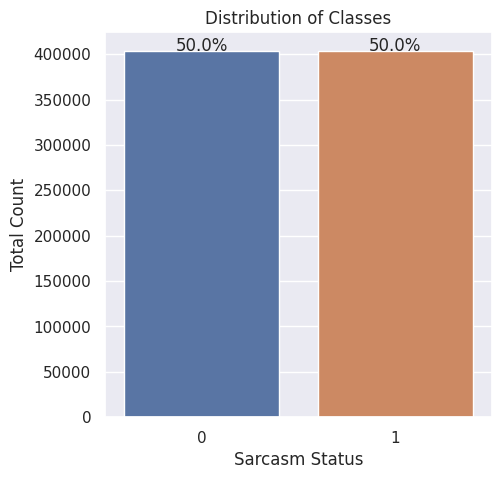

In [14]:
#Plotting percentage of sarcastic and non-sarcastic comments
plt.figure(figsize=(5,5))
ax = sns.countplot(x='label',  data= df2)
ax.set(title = "Distribution of Classes", xlabel="Sarcasm Status", ylabel = "Total Count")
total = float(len(train_df))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.1f}%'.format((height/total)*100),
            ha="center") 
plt.show()

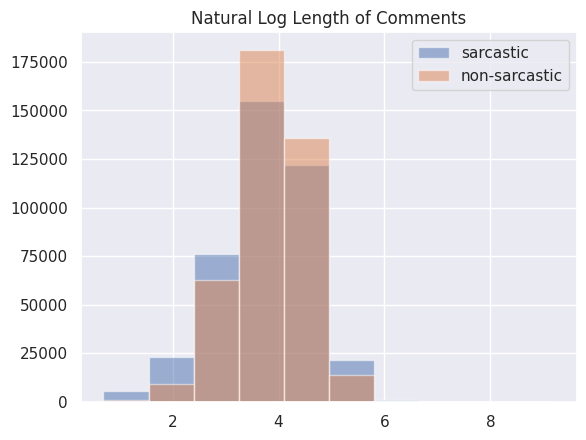

In [15]:
# To check if there is any relation between the length of the comment and its label
df2.loc[df2['label']==1,'Comments'].str.len().apply(np.log1p).hist(label='sarcastic', alpha=.5)
df2.loc[df2['label']==0,'Comments'].str.len().apply(np.log1p).hist(label='non-sarcastic', alpha=.5)
plt.legend()
plt.title('Natural Log Length of Comments')
plt.show()

Sarcastic comments are normally distributed in length. Non-sarcastic comments has a right-skew.

In [16]:
# Comparing sarcastic comments with Parent comments
sarcasm_comm_len = np.array(df2.loc[df2['label'] == 1]['Comments'].str.len())
parent_comm_len = np.array(df2.loc[df2['label'] == 1]['Parent Comments'].str.len())
ratio_len = np.array((df2.loc[df2['label'] == 1]['Comments'].str.len())/(df2.loc[df2['label'] == 1]['Parent Comments'].str.len()))

In [17]:
d = pd.DataFrame({'Comment Length': sarcasm_comm_len, 'Parent Comment Length': parent_comm_len, 'Ratio Length': ratio_len}, columns=['Comment Length', 'Parent Comment Length', 'Ratio Length'])

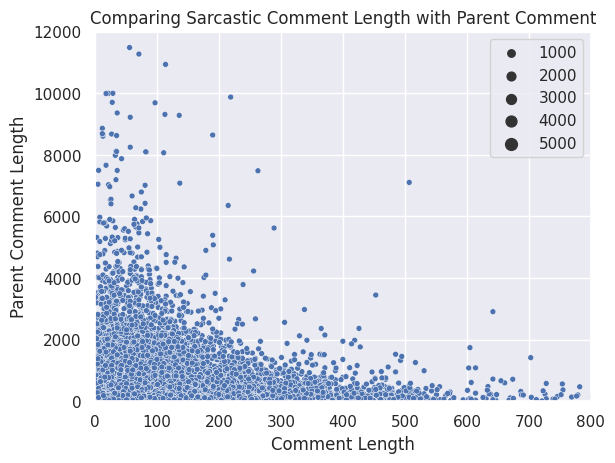

In [18]:
ax = plt.axes()
sns.scatterplot(data=d, x="Comment Length", y="Parent Comment Length",  size=ratio_len)
ax.set_title("Comparing Sarcastic Comment Length with Parent Comment")
# control x and y limits
plt.ylim(0, 12000)
plt.xlim(0, 800)
plt.show()

We find that parent comment length is very large in comparision to the comment length for sarcastic comments.

# Pre-processing Techniques and Feature Engineering

**Stemming**

In [19]:
# Function fro stemming words in comments
analyzer = CountVectorizer().build_analyzer()
def stemmed_words(doc):
  return (PorterStemmer().stem(w) for w in analyzer(doc))

**Lemmatization**

In [20]:
analyzer = CountVectorizer().build_analyzer()
def lemmatized_words(doc):
  return (WordNetLemmatizer().lemmatize(w) for w in analyzer(doc))

***Stop-word removal using Bag of Words Model***

To look at the most frequent words in the Comments using bag of words model

In [21]:
# Without removing stopwords
vectorizer_11 = CountVectorizer(ngram_range=(1, 1)) #unigram
vectorizer_22 = CountVectorizer (ngram_range=(2, 2)) #bigram

In [22]:
# Function to calculate frequency of words in comments
def freq_words(vectorizer, data):
    X = vectorizer.fit_transform(data)
    freqs = zip(vectorizer.get_feature_names(), np.asarray(X.sum(axis=0)).ravel())
    return sorted(freqs, key = lambda x: x[1], reverse=True)[:10]

In [23]:
# frequent unigrams without removing stop-words
l = [freq_words(vectorizer_11, df2[df2['label']==1]['Comments']),
     freq_words(vectorizer_11, df2[df2['label']==0]['Comments'])]
list(map(list, zip(*l)))

/home/tanmay/utkarsha_18300/nlp_18300/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


[[('the', 164633), ('the', 152599)],
 [('to', 97063), ('to', 94916)],
 [('it', 78144), ('you', 82555)],
 [('you', 75482), ('and', 68733)],
 [('and', 71326), ('it', 67958)],
 [('that', 67998), ('that', 66766)],
 [('of', 62974), ('is', 61321)],
 [('is', 62441), ('of', 56959)],
 [('in', 50921), ('in', 42435)],
 [('for', 40099), ('for', 37506)]]

In [24]:
#frequent bigrams without removing stopwords
l = [freq_words(vectorizer_22, df2[df2['label']==1]['Comments']),
     freq_words(vectorizer_22, df2[df2['label']==0]['Comments'])]
list(map(list, zip(*l)))

[[('in the', 12445), ('in the', 10826)],
 [('of the', 12047), ('of the', 9602)],
 [('to be', 7534), ('you re', 8955)],
 [('if you', 7205), ('to be', 7134)],
 [('you re', 7037), ('on the', 5415)],
 [('on the', 6694), ('if you', 5190)],
 [('to the', 5927), ('for the', 5102)],
 [('for the', 5761), ('this is', 5033)],
 [('this is', 5486), ('to the', 4961)],
 [('you can', 5061), ('they re', 4825)]]

Here, the first column shows sarcastic comments and second column shows non-sarcastic comments. Since we have not removed stopwords, we are geeting a lot of stopwords as unigrams here. Also, Unigramms from the sarcastic comments are mostly same as from the non-sarcastic comments, hence these unigramms do not help in seprating sarcastic comments from non-sarcastic comments.   

In [25]:
#Removing stopwords
vectorizer_1 = CountVectorizer(stop_words='english', ngram_range=(1, 1)) #unigram
vectorizer_2 = CountVectorizer(stop_words='english', ngram_range=(2, 2)) #bigram

In [26]:
# Frequent unigrams with removing stop-words
l = [freq_words(vectorizer_1, df2[df2['label']==1]['Comments']),
     freq_words(vectorizer_1, df2[df2['label']==0]['Comments'])]
list(map(list, zip(*l)))

[[('like', 23691), ('just', 26266)],
 [('just', 22632), ('yeah', 25803)],
 [('don', 15321), ('like', 20921)],
 [('people', 12410), ('people', 17031)],
 [('think', 12262), ('don', 16952)],
 [('good', 9412), ('right', 12257)],
 [('know', 9209), ('know', 11565)],
 [('really', 8352), ('good', 10149)],
 [('time', 8250), ('sure', 10009)],
 [('fuck', 7532), ('yes', 9555)]]

In [27]:
#frequent bigrams with removing stop-words
l = [freq_words(vectorizer_2, df2[df2['label']==1]['Comments']),
     freq_words(vectorizer_2, df2[df2['label']==0]['Comments'])]
list(map(list, zip(*l)))

[[('fuck fuck', 3255), ('don know', 2295)],
 [('looks like', 2056), ('sounds like', 1591)],
 [('don know', 1763), ('just like', 1483)],
 [('don think', 1565), ('good thing', 1313)],
 [('comcast comcast', 1436), ('looks like', 1155)],
 [('jerry jerry', 1341), ('white people', 1010)],
 [('sounds like', 1320), ('don worry', 931)],
 [('iphone iphone', 1111), ('didn know', 897)],
 [('pretty sure', 1073), ('oh yeah', 880)],
 [('copy pasta', 919), ('black people', 829)]]

As we can see that the  bigramms vectorizer after removal of stopwords shows us better (more specific) results as compared to unigrams. Also, removal of stop-words reduces the dataset and hence, vectorization becomes quicker.

In [28]:
# df2 = df2[:5000] #RAM crashes if we take more dataset

In [29]:
# corpus = df2['Comments'].values.astype('U') # converting to unicode because system unable to identify special characters.

In [30]:
# corpus

In [31]:
# labels = df2['label'].to_list()

***Tf-idf Vectorizer***

In [32]:
# #vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1,1))
# vectorizer = TfidfVectorizer(ngram_range=(1,1))

# tfidf = vectorizer.fit_transform(corpus)

In [33]:
# tfidf = tfidf.toarray()

In [34]:
df3 = df2.dropna(subset=['Comments', 'label'], inplace=False)

In [35]:
df3 = df3[:5000]

In [36]:
df3

,ID,Comments,Parent Comments,label
0,ocxtitan,Central Illinois,Jesus; where do you live?,1
1,LeChuckly,To think - CNN used to be the acronym synonymo...,Even The CNN Staff Is Sick Of The Wall-To-Wall...,1
2,throwitskrub8,But then again; you have to consider that all ...,agree to that part.It can also mean that gujra...,1
3,fresherthanyouuu,ughhhhh,If a guy told you he doesn't use social media ...,1
4,_kushagra,I should've put the,No; it's just a programming bug. After all; th...,0
...,...,...,...,...
4995,SmashMan140,Yeah you can play the NES or Famicom version o...,Hmm; what is this Rockman mode? Is it playing ...,1
4996,Alexander_Dumass,I prefer to call the the SchuMasacre,Batman and Batman Returns are good. Batman For...,1
4997,CatfishRadiator,stop propagating rape culture with your rape j...,*shhhhh* just let it happen...,0
4998,Harbingerofmeh,But persistence will make her fall in love wit...,All of this happened on kik too. He doesn't se...,0


## Training the model

### Logistic Regression

*Without removing stop-words*

In [37]:
train_x, test_x, train_y, test_y = train_test_split(df3['Comments'], df3['label'], test_size=0.20, random_state=42)
#Classifier
clf_lr=LogisticRegression(class_weight='balanced') 
clf_lr_parameters = {'clf__solver':('newton-cg','lbfgs','liblinear','saga')}    
        
#Feature Extraction
pipeline = Pipeline([
('vect', CountVectorizer(token_pattern=r'\b\w+\b')),
('tfidf', TfidfTransformer(use_idf=True,smooth_idf=True)),     
('clf', clf_lr),]) 


#Classificaion
parameters={**clf_lr_parameters} 
grid = GridSearchCV(pipeline,parameters,scoring='f1_micro',cv=10)          
grid.fit(train_x,train_y)     
clf= grid.best_estimator_  
print('********* Best Set of Parameters ********* \n\n')
print(clf)

predicted = clf.predict(test_x)
predicted =list(predicted)

********* Best Set of Parameters ********* 


Pipeline(steps=[('vect', CountVectorizer(token_pattern='\\b\\w+\\b')),
                ('tfidf', TfidfTransformer()),
                ('clf',
                 LogisticRegression(class_weight='balanced',
                                    solver='newton-cg'))])


In [38]:
accuracy_lr1 = accuracy_score(test_y, predicted)


In [39]:
# Getting the accuracy metric
acc = accuracy_score(predicted, test_y)
pre = precision_score(predicted, test_y, average = 'micro')
rec = recall_score(predicted, test_y)
f1 = f1_score(predicted, test_y)
micro_f1 = f1_score(predicted, test_y, average = 'micro')

print ('Model Performance Statistic Suite-1 (Logistic Regression): ')
print ('Accuracy: ', acc)
print ('Micro-averaged Precision: ', pre)
print ('Recall: ',rec)
print ('F1 Score: ', f1)
print('Micro-averaged f1: ', micro_f1)

cm = confusion_matrix(test_y,predicted)

Model Performance Statistic Suite-1 (Logistic Regression): 
Accuracy:  0.595
Micro-averaged Precision:  0.595
Recall:  0.5971074380165289
F1 Score:  0.5879959308240081
Micro-averaged f1:  0.595


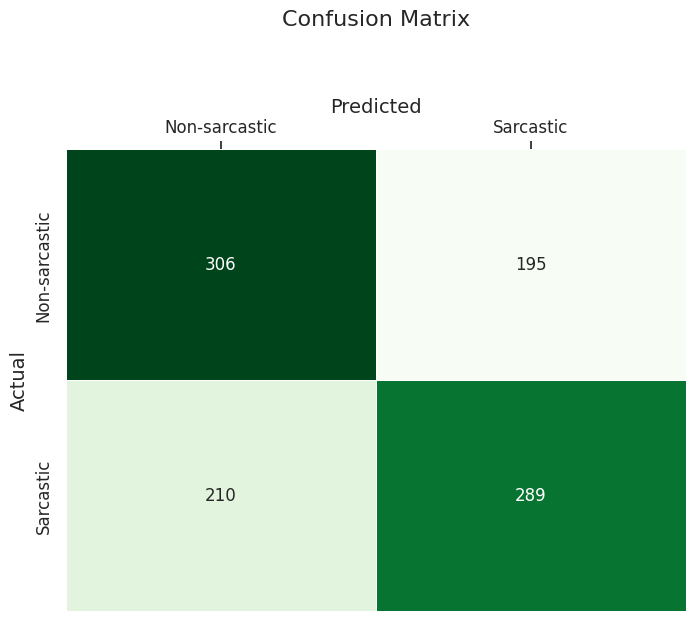

In [40]:
cm =  pd.DataFrame(cm, index=['Non-sarcastic','Sarcastic'],columns=['Non-sarcastic','Sarcastic'])
fig = plt.figure(figsize=(8,6))
ax = sns.heatmap(cm,annot=True,cbar=False, cmap='Greens',linewidths=0.5,fmt='.0f')
ax.set_title('Confusion Matrix',fontsize=16,y=1.25)
ax.set_ylabel('Actual',fontsize=14)
ax.set_xlabel('Predicted',fontsize=14)
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
ax.tick_params(labelsize=12)

*Removing stop-words*

In [41]:
train_x, test_x, train_y, test_y = train_test_split(df3['Comments'], df3['label'], test_size=0.20, random_state=42)
#Classifier
clf_lr=LogisticRegression(class_weight='balanced') 
clf_lr_parameters = {'clf__solver':('newton-cg','lbfgs','liblinear','saga')}    
        
#Feature Extraction
pipeline = Pipeline([
('vect', CountVectorizer(token_pattern=r'\b\w+\b')),
('tfidf', TfidfTransformer(use_idf=True,smooth_idf=True)),     
('clf', clf_lr),]) 

feature_parameters = {
"vect__stop_words": (None, 'english'),
'vect__ngram_range': ((1,1),(1, 2)),  # Unigrams, Bigrams
}

#Classificaion
parameters={**feature_parameters,**clf_lr_parameters} 
grid = GridSearchCV(pipeline,parameters,scoring='f1_micro',cv=10)          
grid.fit(train_x,train_y)     
clf= grid.best_estimator_  
print('********* Best Set of Parameters ********* \n\n')
print(clf)

predicted = clf.predict(test_x)
predicted =list(predicted)

********* Best Set of Parameters ********* 


Pipeline(steps=[('vect',
                 CountVectorizer(ngram_range=(1, 2),
                                 token_pattern='\\b\\w+\\b')),
                ('tfidf', TfidfTransformer()),
                ('clf',
                 LogisticRegression(class_weight='balanced',
                                    solver='newton-cg'))])


In [42]:
accuracy_lr2 = accuracy_score(test_y, predicted)

In [43]:
# Getting the accuracy metric
acc = accuracy_score(predicted, test_y)
pre = precision_score(predicted, test_y, average = 'micro')
rec = recall_score(predicted, test_y)
f1 = f1_score(predicted, test_y)
micro_f1 = f1_score(predicted, test_y, average = 'micro')

print ('Model Performance Statistic Suite-1 (Logistic Regression): ')
print ('Accuracy: ', acc)
print ('Micro-averaged Precision: ', pre)
print ('Recall: ',rec)
print ('F1 Score: ', f1)
print('Micro-averaged f1: ', micro_f1)

cm = confusion_matrix(test_y,predicted)

Model Performance Statistic Suite-1 (Logistic Regression): 
Accuracy:  0.594
Micro-averaged Precision:  0.594
Recall:  0.6004319654427646
F1 Score:  0.5779625779625779
Micro-averaged f1:  0.594


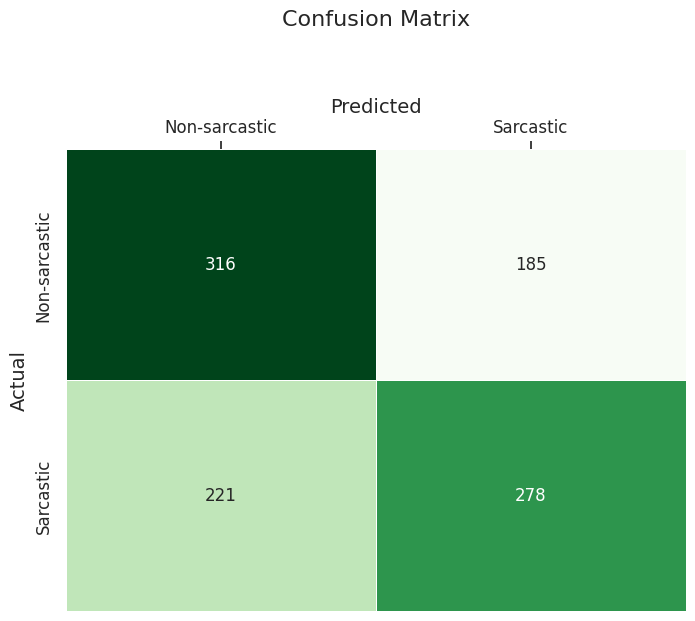

In [44]:
cm =  pd.DataFrame(cm, index=['Non-sarcastic','Sarcastic'],columns=['Non-sarcastic','Sarcastic'])
fig = plt.figure(figsize=(8,6))
ax = sns.heatmap(cm,annot=True,cbar=False, cmap='Greens',linewidths=0.5,fmt='.0f')
ax.set_title('Confusion Matrix',fontsize=16,y=1.25)
ax.set_ylabel('Actual',fontsize=14)
ax.set_xlabel('Predicted',fontsize=14)
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
ax.tick_params(labelsize=12)

*Applying Lemmatization*

In [45]:
clf=LogisticRegression()  
vectorizer=TfidfVectorizer(analyzer = lemmatized_words,ngram_range=(1,2),token_pattern=r'\b\w+\b')
tfidf = vectorizer.fit_transform(df3['Comments'])
tfidf = tfidf.toarray()
# Training and Test Split           
  
train_x, test_x, train_y, test_y = train_test_split(tfidf, df3['label'], test_size=0.20, random_state=42)

#Classificaion    
clf.fit(train_x,train_y)
predicted = clf.predict(test_x)
predicted =list(predicted)

In [46]:
accuracy_lr3 = accuracy_score(test_y, predicted)

In [47]:
# Getting the accuracy metric
acc = accuracy_score(predicted, test_y)
pre = precision_score(predicted, test_y, average = 'micro')
rec = recall_score(predicted, test_y)
f1 = f1_score(predicted, test_y)
micro_f1 = f1_score(predicted, test_y, average = 'micro')

print ('Model Performance Statistic Suite-1 (Logistic Regression): ')
print ('Accuracy: ', acc)
print ('Micro-averaged Precision: ', pre)
print ('Recall: ',rec)
print ('F1 Score: ', f1)
print('Micro-averaged f1: ', micro_f1)

cm = confusion_matrix(test_y,predicted)

Model Performance Statistic Suite-1 (Logistic Regression): 
Accuracy:  0.6
Micro-averaged Precision:  0.6
Recall:  0.5932203389830508
F1 Score:  0.6116504854368932
Micro-averaged f1:  0.6


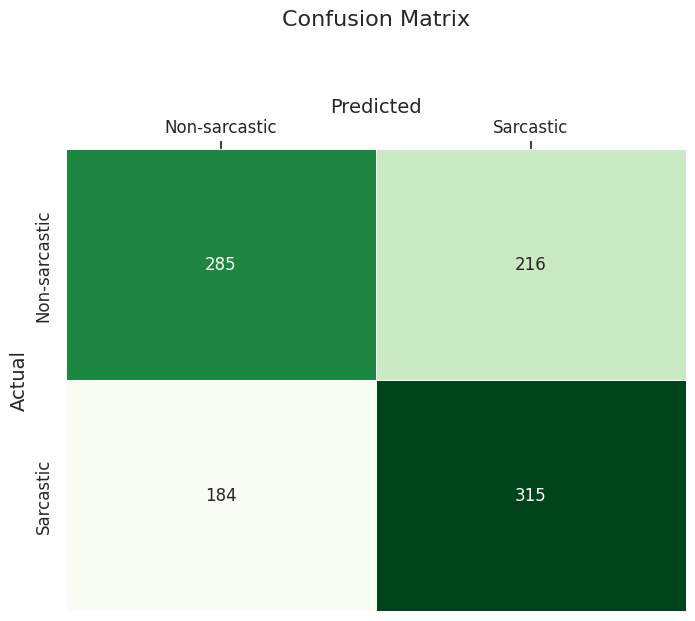

In [48]:
cm =  pd.DataFrame(cm, index=['Non-sarcastic','Sarcastic'],columns=['Non-sarcastic','Sarcastic'])
fig = plt.figure(figsize=(8,6))
ax = sns.heatmap(cm,annot=True,cbar=False, cmap='Greens',linewidths=0.5,fmt='.0f')
ax.set_title('Confusion Matrix',fontsize=16,y=1.25)
ax.set_ylabel('Actual',fontsize=14)
ax.set_xlabel('Predicted',fontsize=14)
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
ax.tick_params(labelsize=12)

*Applying Stemming*

In [50]:
train_x, test_x, train_y, test_y = train_test_split(tfidf, df3['label'], test_size=0.20, random_state=42)

#classifier
clf=LogisticRegression(random_state=42)  
vectorizer=TfidfVectorizer(analyzer = stemmed_words, ngram_range=(1,2), token_pattern=r'\b\w+\b')
tfidf = vectorizer.fit_transform(df3['Comments'])
tfidf = tfidf.toarray()

#classification
clf.fit(train_x,train_y)
predicted = clf.predict(test_x)
predicted =list(predicted)

In [51]:
accuracy_lr4 = accuracy_score(test_y, predicted)

In [52]:
# Getting the accuracy metric
acc = accuracy_score(predicted, test_y)
pre = precision_score(predicted, test_y, average = 'micro')
rec = recall_score(predicted, test_y)
f1 = f1_score(predicted, test_y)
micro_f1 = f1_score(predicted, test_y, average = 'micro')

print ('Model Performance Statistic Suite-1 (Logistic Regression): ')
print ('Accuracy: ', acc)
print ('Micro-averaged Precision: ', pre)
print ('Recall: ',rec)
print ('F1 Score: ', f1)
print('Micro-averaged f1: ', micro_f1)

cm = confusion_matrix(test_y,predicted)

Model Performance Statistic Suite-1 (Logistic Regression): 
Accuracy:  0.6
Micro-averaged Precision:  0.6
Recall:  0.5932203389830508
F1 Score:  0.6116504854368932
Micro-averaged f1:  0.6


### Decision Tree classifier

In [70]:
train_x, test_x, train_y, test_y = train_test_split(df3['Comments'], df3['label'], test_size=0.20, random_state=42)
#Classifier

clf_dt=DecisionTreeClassifier()

clf_parameters = {
            'clf__criterion':('gini', 'entropy'), 
            'clf__max_features':('auto', 'sqrt', 'log2'),
            'clf__max_depth':(10,40,45,60),
            'clf__ccp_alpha':(0.009,0.01,0.05,0.1),}

#Feature Extraction
pipeline = Pipeline([
('vect', CountVectorizer(token_pattern=r'\b\w+\b')),
('tfidf', TfidfTransformer(use_idf=True,smooth_idf=True)),     
('clf', clf_dt),]) 
    


#Classificaion
parameters={**clf_parameters} 
grid = GridSearchCV(pipeline,parameters,scoring='f1_micro',cv=10, n_jobs = -1)          
grid.fit(train_x,train_y)     
clf= grid.best_estimator_  
print('********* Best Set of Parameters ********* \n\n')
print(clf)

predicted = clf.predict(test_x)
predicted =list(predicted)


/home/tanmay/utkarsha_18300/nlp_18300/lib/python3.8/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/home/tanmay/utkarsha_18300/nlp_18300/lib/python3.8/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/home/tanmay/utkarsha_18300/nlp_18300/lib/python3.8/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/home/tanmay/utkarsha_18300/nlp_18300/lib/python3.8/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3.

********* Best Set of Parameters ********* 


Pipeline(steps=[('vect', CountVectorizer(token_pattern='\\b\\w+\\b')),
                ('tfidf', TfidfTransformer()),
                ('clf',
                 DecisionTreeClassifier(ccp_alpha=0.01, criterion='entropy',
                                        max_depth=60, max_features='auto'))])


/home/tanmay/utkarsha_18300/nlp_18300/lib/python3.8/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


In [71]:
accuracy_dt1 = accuracy_score(test_y, predicted)

In [72]:
# Getting the accuracy metric
acc = accuracy_score(predicted, test_y)
pre = precision_score(predicted, test_y, average = 'micro')
rec = recall_score(predicted, test_y)
f1 = f1_score(predicted, test_y)
micro_f1 = f1_score(predicted, test_y, average = 'micro')

print ('Model Performance Statistic Suite-1 (Logistic Regression): ')
print ('Accuracy: ', acc)
print ('Micro-averaged Precision: ', pre)
print ('Recall: ',rec)
print ('F1 Score: ', f1)
print('Micro-averaged f1: ', micro_f1)

cm = confusion_matrix(test_y,predicted)

Model Performance Statistic Suite-1 (Logistic Regression): 
Accuracy:  0.499
Micro-averaged Precision:  0.499
Recall:  0.499
F1 Score:  0.6657771847898598
Micro-averaged f1:  0.499


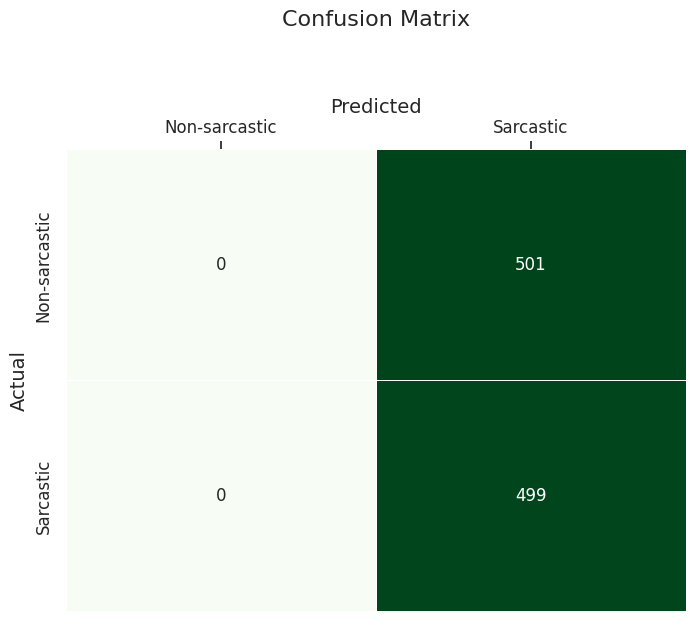

In [73]:
cm =  pd.DataFrame(cm, index=['Non-sarcastic','Sarcastic'],columns=['Non-sarcastic','Sarcastic'])
fig = plt.figure(figsize=(8,6))
ax = sns.heatmap(cm,annot=True,cbar=False, cmap='Greens',linewidths=0.5,fmt='.0f')
ax.set_title('Confusion Matrix',fontsize=16,y=1.25)
ax.set_ylabel('Actual',fontsize=14)
ax.set_xlabel('Predicted',fontsize=14)
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
ax.tick_params(labelsize=12)

*Removing stop-words*

In [74]:
train_x, test_x, train_y, test_y = train_test_split(df3['Comments'], df3['label'], test_size=0.20, random_state=42)
#Classifier

clf=DecisionTreeClassifier()

clf_parameters = {
            'clf__criterion':('gini', 'entropy'), 
            'clf__max_features':('auto', 'sqrt', 'log2'),
            'clf__max_depth':(10,40,45,60),
            'clf__ccp_alpha':(0.009,0.01,0.05,0.1),}
        
#Feature Extraction
pipeline = Pipeline([
('vect', CountVectorizer(token_pattern=r'\b\w+\b')),
('tfidf', TfidfTransformer(use_idf=True,smooth_idf=True)),     
('clf', clf),]) 

feature_parameters = {
"vect__stop_words": (None, 'english'),
'vect__ngram_range': ((1,1),(1, 2)),  # Unigrams, Bigrams or Trigrams
}

#Classificaion
parameters={**clf_parameters} 
grid = GridSearchCV(pipeline,parameters,scoring='f1_micro',cv=10, n_jobs = -1)          
grid.fit(train_x,train_y)     
clf= grid.best_estimator_  
print('********* Best Set of Parameters ********* \n\n')
print(clf)

predicted = clf.predict(test_x)
predicted =list(predicted)

/home/tanmay/utkarsha_18300/nlp_18300/lib/python3.8/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/home/tanmay/utkarsha_18300/nlp_18300/lib/python3.8/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/home/tanmay/utkarsha_18300/nlp_18300/lib/python3.8/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/home/tanmay/utkarsha_18300/nlp_18300/lib/python3.8/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3.

********* Best Set of Parameters ********* 


Pipeline(steps=[('vect', CountVectorizer(token_pattern='\\b\\w+\\b')),
                ('tfidf', TfidfTransformer()),
                ('clf',
                 DecisionTreeClassifier(ccp_alpha=0.009, criterion='entropy',
                                        max_depth=40, max_features='sqrt'))])


In [75]:
accuracy_dt2 = accuracy_score(test_y, predicted)

In [76]:
# Getting the accuracy metric
acc = accuracy_score(predicted, test_y)
pre = precision_score(predicted, test_y, average = 'micro')
rec = recall_score(predicted, test_y)
f1 = f1_score(predicted, test_y)
micro_f1 = f1_score(predicted, test_y, average = 'micro')

print ('Model Performance Statistic Suite-1 (Logistic Regression): ')
print ('Accuracy: ', acc)
print ('Micro-averaged Precision: ', pre)
print ('Recall: ',rec)
print ('F1 Score: ', f1)
print('Micro-averaged f1: ', micro_f1)

cm = confusion_matrix(test_y,predicted)

Model Performance Statistic Suite-1 (Logistic Regression): 
Accuracy:  0.499
Micro-averaged Precision:  0.499
Recall:  0.499
F1 Score:  0.6657771847898598
Micro-averaged f1:  0.499


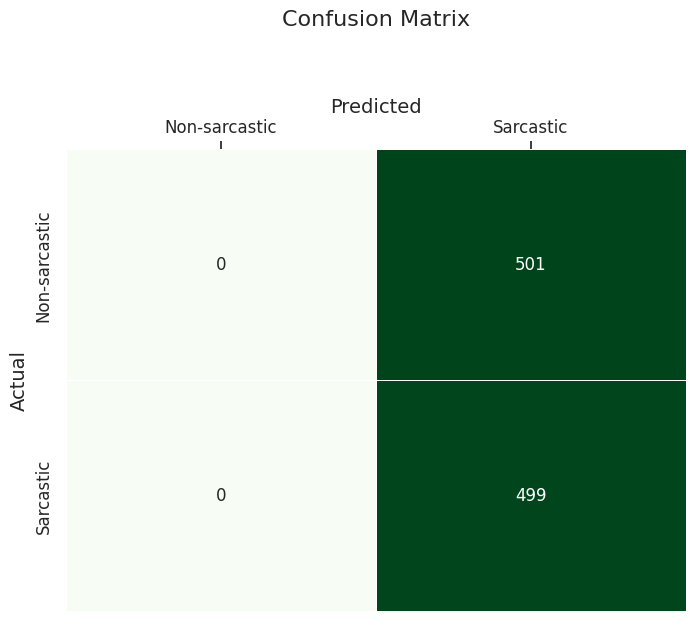

In [77]:
cm =  pd.DataFrame(cm, index=['Non-sarcastic','Sarcastic'],columns=['Non-sarcastic','Sarcastic'])
fig = plt.figure(figsize=(8,6))
ax = sns.heatmap(cm,annot=True,cbar=False, cmap='Greens',linewidths=0.5,fmt='.0f')
ax.set_title('Confusion Matrix',fontsize=16,y=1.25)
ax.set_ylabel('Actual',fontsize=14)
ax.set_xlabel('Predicted',fontsize=14)
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
ax.tick_params(labelsize=12)

*Applying Stemming*

In [78]:
train_x, test_x, train_y, test_y = train_test_split(tfidf, df3['label'], test_size=0.20, random_state=42)

#classifier
clf=DecisionTreeClassifier()
vectorizer=TfidfVectorizer(analyzer = stemmed_words, ngram_range=(1,2), token_pattern=r'\b\w+\b')
tfidf = vectorizer.fit_transform(df3['Comments'])
tfidf = tfidf.toarray()

#classification
clf.fit(train_x,train_y)
predicted = clf.predict(test_x)
predicted =list(predicted)

In [79]:
accuracy_dt3 = accuracy_score(test_y, predicted)

In [80]:
# Getting the accuracy metric
acc = accuracy_score(predicted, test_y)
pre = precision_score(predicted, test_y, average = 'micro')
rec = recall_score(predicted, test_y)
f1 = f1_score(predicted, test_y)
micro_f1 = f1_score(predicted, test_y, average = 'micro')

print ('Model Performance Statistic Suite-1 (Logistic Regression): ')
print ('Accuracy: ', acc)
print ('Micro-averaged Precision: ', pre)
print ('Recall: ',rec)
print ('F1 Score: ', f1)
print('Micro-averaged f1: ', micro_f1)

cm = confusion_matrix(test_y,predicted)

Model Performance Statistic Suite-1 (Logistic Regression): 
Accuracy:  0.57
Micro-averaged Precision:  0.57
Recall:  0.5672514619883041
F1 Score:  0.575098814229249
Micro-averaged f1:  0.57


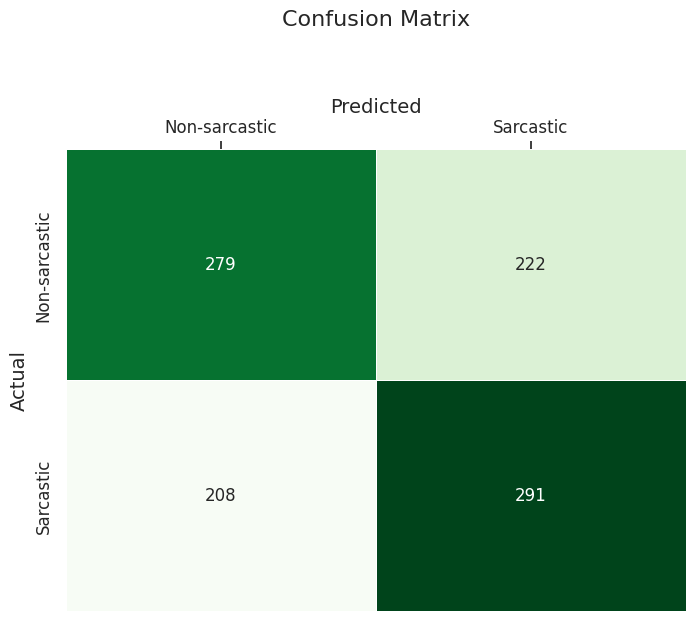

In [81]:
cm =  pd.DataFrame(cm, index=['Non-sarcastic','Sarcastic'],columns=['Non-sarcastic','Sarcastic'])
fig = plt.figure(figsize=(8,6))
ax = sns.heatmap(cm,annot=True,cbar=False, cmap='Greens',linewidths=0.5,fmt='.0f')
ax.set_title('Confusion Matrix',fontsize=16,y=1.25)
ax.set_ylabel('Actual',fontsize=14)
ax.set_xlabel('Predicted',fontsize=14)
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
ax.tick_params(labelsize=12)

*Applying Lemmatization*

In [82]:
clf=DecisionTreeClassifier()  
vectorizer=TfidfVectorizer(analyzer = lemmatized_words,ngram_range=(1,2),token_pattern=r'\b\w+\b')
tfidf = vectorizer.fit_transform(df3['Comments'])
tfidf = tfidf.toarray()
# Training and Test Split           
  
train_x, test_x, train_y, test_y = train_test_split(tfidf, df3['label'], test_size=0.20, random_state=42)

#Classificaion    
clf.fit(train_x,train_y)
predicted = clf.predict(test_x)
predicted =list(predicted)

In [83]:
accuracy_dt4 = accuracy_score(test_y, predicted)

In [84]:
# Getting the accuracy metric
acc = accuracy_score(predicted, test_y)
pre = precision_score(predicted, test_y, average = 'micro')
rec = recall_score(predicted, test_y)
f1 = f1_score(predicted, test_y)
micro_f1 = f1_score(predicted, test_y, average = 'micro')

print ('Model Performance Statistic Suite-1 (Logistic Regression): ')
print ('Accuracy: ', acc)
print ('Micro-averaged Precision: ', pre)
print ('Recall: ',rec)
print ('F1 Score: ', f1)
print('Micro-averaged f1: ', micro_f1)

cm = confusion_matrix(test_y,predicted)

Model Performance Statistic Suite-1 (Logistic Regression): 
Accuracy:  0.559
Micro-averaged Precision:  0.559
Recall:  0.5594262295081968
F1 Score:  0.5531914893617021
Micro-averaged f1:  0.559


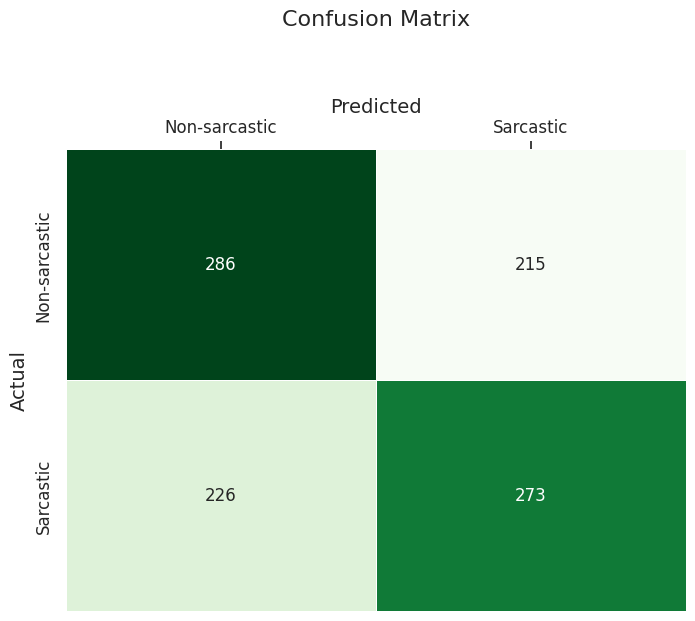

In [85]:
cm =  pd.DataFrame(cm, index=['Non-sarcastic','Sarcastic'],columns=['Non-sarcastic','Sarcastic'])
fig = plt.figure(figsize=(8,6))
ax = sns.heatmap(cm,annot=True,cbar=False, cmap='Greens',linewidths=0.5,fmt='.0f')
ax.set_title('Confusion Matrix',fontsize=16,y=1.25)
ax.set_ylabel('Actual',fontsize=14)
ax.set_xlabel('Predicted',fontsize=14)
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
ax.tick_params(labelsize=12)

### Multinomial Naive Bayes

In [87]:
train_x, test_x, train_y, test_y = train_test_split(df3['Comments'], df3['label'], test_size=0.20, random_state=42)
#Classifier

clf_mnb=MultinomialNB(fit_prior=True, class_prior=None)


clf_parameters = {'clf__alpha':(0,1,2),}   
        
#Feature Extraction
pipeline = Pipeline([
('vect', CountVectorizer(token_pattern=r'\b\w+\b')),
('tfidf', TfidfTransformer(use_idf=True,smooth_idf=True)),     
('clf', clf_mnb),]) 
    


#Classificaion
parameters={**clf_parameters} 
grid = GridSearchCV(pipeline,parameters,scoring='f1_micro',cv=10, n_jobs = -1)          
grid.fit(train_x,train_y)     
clf= grid.best_estimator_  
print('********* Best Set of Parameters ********* \n\n')
print(clf)

predicted = clf.predict(test_x)
predicted =list(predicted)


/home/tanmay/utkarsha_18300/nlp_18300/lib/python3.8/site-packages/sklearn/naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
/home/tanmay/utkarsha_18300/nlp_18300/lib/python3.8/site-packages/sklearn/naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
/home/tanmay/utkarsha_18300/nlp_18300/lib/python3.8/site-packages/sklearn/naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
/home/tanmay/utkarsha_18300/nlp_18300/lib/python3.8/site-packages/sklearn/naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
/home/tanmay/utkarsha_18300/nlp_18300/lib/python3.8/site-packages/sklearn/naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
/home/tanmay/utkarsha_183

********* Best Set of Parameters ********* 


Pipeline(steps=[('vect', CountVectorizer(token_pattern='\\b\\w+\\b')),
                ('tfidf', TfidfTransformer()),
                ('clf', MultinomialNB(alpha=1))])


In [88]:
accuracy_mnb1 = accuracy_score(test_y, predicted)

In [89]:
# Getting the accuracy metric
acc = accuracy_score(predicted, test_y)
pre = precision_score(predicted, test_y, average = 'micro')
rec = recall_score(predicted, test_y)
f1 = f1_score(predicted, test_y)
micro_f1 = f1_score(predicted, test_y, average = 'micro')

print ('Model Performance Statistic Suite-1 (MNB): ')
print ('Accuracy: ', acc)
print ('Micro-averaged Precision: ', pre)
print ('Recall: ',rec)
print ('F1 Score: ', f1)
print('Micro f1: ', micro_f1)

cm = confusion_matrix(predicted, test_y)


Model Performance Statistic Suite-1 (MNB): 
Accuracy:  0.582
Micro-averaged Precision:  0.582
Recall:  0.594847775175644
F1 Score:  0.5485961123110151
Micro f1:  0.582


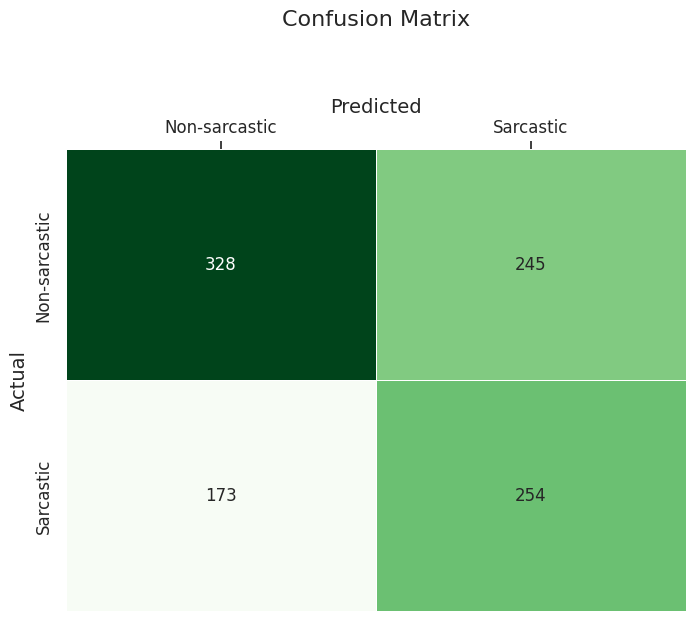

In [90]:
cm =  pd.DataFrame(cm, index=['Non-sarcastic','Sarcastic'],columns=['Non-sarcastic','Sarcastic'])
fig = plt.figure(figsize=(8,6))
ax = sns.heatmap(cm,annot=True,cbar=False, cmap='Greens',linewidths=0.5,fmt='.0f')
ax.set_title('Confusion Matrix',fontsize=16,y=1.25)
ax.set_ylabel('Actual',fontsize=14)
ax.set_xlabel('Predicted',fontsize=14)
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
ax.tick_params(labelsize=12)

In [91]:
# print ('Training Accuracies for comments without removing stop-words : ')
# print ('Logistic Regression: ', accuracy_lr1)
# print ('Support Vector Machine: ', accuracy_svm1)
# print ('Multinomial Naive Bayes ', accuracy_mnb1)


In [92]:
train_x, test_x, train_y, test_y = train_test_split(df3['Comments'], df3['label'], test_size=0.20, random_state=42)
#Classifier

clf=MultinomialNB(fit_prior=True, class_prior=None)


clf_parameters = {'clf__alpha':(0,1,2),}   
        
#Feature Extraction
pipeline = Pipeline([
('vect', CountVectorizer(token_pattern=r'\b\w+\b')),
('tfidf', TfidfTransformer(use_idf=True,smooth_idf=True)),     
('clf', clf),]) 

feature_parameters = {
"vect__stop_words": (None, 'english'),
'vect__ngram_range': ((1,1),(1, 2)),  # Unigrams, Bigrams or Trigrams
}



#Classificaion
parameters={**feature_parameters,**clf_parameters} 
grid = GridSearchCV(pipeline,parameters,scoring='f1_micro',cv=10)          
grid.fit(train_x,train_y)     
clf= grid.best_estimator_  
print('********* Best Set of Parameters ********* \n\n')
print(clf)

predicted = clf.predict(test_x)
predicted =list(predicted)


/home/tanmay/utkarsha_18300/nlp_18300/lib/python3.8/site-packages/sklearn/naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
/home/tanmay/utkarsha_18300/nlp_18300/lib/python3.8/site-packages/sklearn/naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
/home/tanmay/utkarsha_18300/nlp_18300/lib/python3.8/site-packages/sklearn/naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
/home/tanmay/utkarsha_18300/nlp_18300/lib/python3.8/site-packages/sklearn/naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
/home/tanmay/utkarsha_18300/nlp_18300/lib/python3.8/site-packages/sklearn/naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
/home/tanmay/utkarsha_183

********* Best Set of Parameters ********* 


Pipeline(steps=[('vect',
                 CountVectorizer(ngram_range=(1, 2),
                                 token_pattern='\\b\\w+\\b')),
                ('tfidf', TfidfTransformer()),
                ('clf', MultinomialNB(alpha=1))])


In [93]:
accuracy_mnb2 = accuracy_score(test_y, predicted)

In [94]:
# Getting the accuracy metric
acc = accuracy_score(predicted, test_y)
pre = precision_score(predicted, test_y, average = 'micro')
rec = recall_score(predicted, test_y)
f1 = f1_score(predicted, test_y)
micro_f1 = f1_score(predicted, test_y, average = 'micro')

print ('Model Performance Statistic Suite-2 (MNB): ')
print ('Accuracy: ', acc)
print ('Precision: ', pre)
print ('Recall: ',rec)
print ('F1 Score: ', f1)
print('Micro f1: ', micro_f1)

cm = confusion_matrix(predicted, test_y)

sensitivity = cm[0,0]/(cm[0,0]+cm[1,0])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[0,1]+cm[1,1])
print('Specificity : ', specificity)

Model Performance Statistic Suite-2 (MNB): 
Accuracy:  0.607
Precision:  0.607
Recall:  0.6199095022624435
F1 Score:  0.5823591923485654
Micro f1:  0.607
Sensitivity :  0.6646706586826348
Specificity :  0.5490981963927856


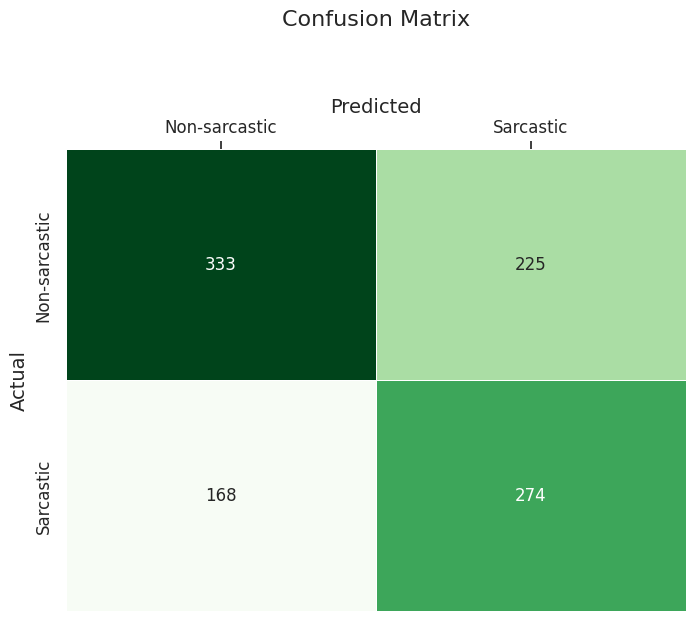

In [95]:
cm =  pd.DataFrame(cm, index=['Non-sarcastic','Sarcastic'],columns=['Non-sarcastic','Sarcastic'])
fig = plt.figure(figsize=(8,6))
ax = sns.heatmap(cm,annot=True,cbar=False, cmap='Greens',linewidths=0.5,fmt='.0f')
ax.set_title('Confusion Matrix',fontsize=16,y=1.25)
ax.set_ylabel('Actual',fontsize=14)
ax.set_xlabel('Predicted',fontsize=14)
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
ax.tick_params(labelsize=12)

In [96]:
# print ('Training Accuracies for comments after removing stop-words : ')
# print ('Logistic Regression: ', accuracy_lr2)
# print ('Support Vector Machine: ', accuracy_svm2)
# print ('Multinomial Naive Bayes ', accuracy_mnb2)


When we applied stop words, number of words decreased and in most cases the meaning of the comments ight have also changed that's why the accuracy of all the 3 classifiers has decreased on removing stopwords.

In [97]:
train_x, test_x, train_y, test_y = train_test_split(tfidf, df3['label'], test_size=0.20, random_state=42)

#classifier
clf=MultinomialNB(alpha=0,fit_prior=True, class_prior=None)  
vectorizer=TfidfVectorizer(analyzer = stemmed_words, ngram_range=(1,1), token_pattern=r'\b\w+\b')
tfidf = vectorizer.fit_transform(df3['Comments'])
tfidf = tfidf.toarray()

#classification
clf.fit(train_x,train_y)
predicted = clf.predict(test_x)
predicted =list(predicted)

/home/tanmay/utkarsha_18300/nlp_18300/lib/python3.8/site-packages/sklearn/naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(


In [98]:
accuracy_mnb3 = accuracy_score(test_y, predicted)

In [99]:
# Getting the accuracy metric
acc = accuracy_score(predicted, test_y)
pre = precision_score(predicted, test_y, average = 'micro')
rec = recall_score(predicted, test_y)
f1 = f1_score(predicted, test_y)
micro_f1 = f1_score(predicted, test_y, average = 'micro')

print ('Model Performance Statistic Suite-3 (MNB): ')
print ('Accuracy: ', acc)
print ('Precision: ', pre)
print ('Recall: ',rec)
print ('F1 Score: ', f1)
print('Micro f1: ', micro_f1)

cm = confusion_matrix(predicted, test_y)

sensitivity = cm[0,0]/(cm[0,0]+cm[1,0])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[0,1]+cm[1,1])
print('Specificity : ', specificity)

Model Performance Statistic Suite-3 (MNB): 
Accuracy:  0.557
Precision:  0.557
Recall:  0.5590717299578059
F1 Score:  0.5447070914696813
Micro f1:  0.557
Sensitivity :  0.5828343313373253
Specificity :  0.531062124248497


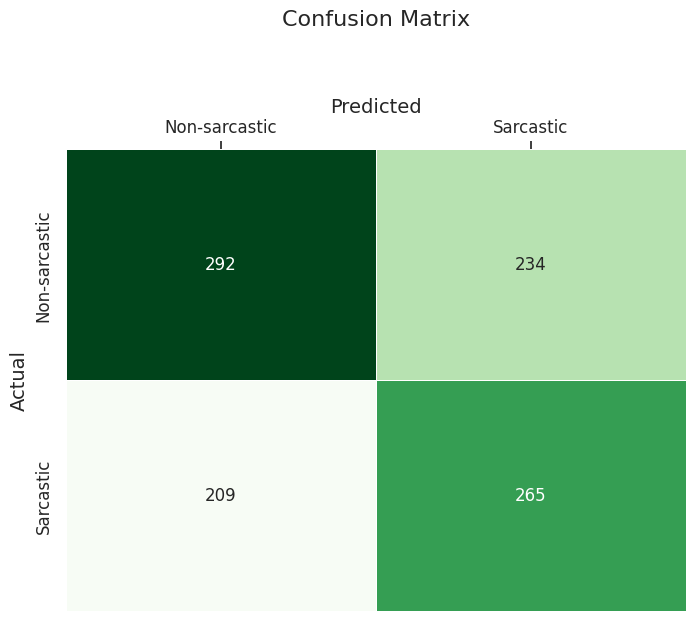

In [100]:
cm =  pd.DataFrame(cm, index=['Non-sarcastic','Sarcastic'],columns=['Non-sarcastic','Sarcastic'])
fig = plt.figure(figsize=(8,6))
ax = sns.heatmap(cm,annot=True,cbar=False, cmap='Greens',linewidths=0.5,fmt='.0f')
ax.set_title('Confusion Matrix',fontsize=16,y=1.25)
ax.set_ylabel('Actual',fontsize=14)
ax.set_xlabel('Predicted',fontsize=14)
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
ax.tick_params(labelsize=12)

In [101]:
# print ('Training Accuracies for comments with stemming : ')
# print ('Logistic Regression: ', accuracy_lr3)
# print ('Support Vector Machine: ', accuracy_svm3)
# print ('Multinomial Naive Bayes ', accuracy_mnb3)


In [102]:
clf=MultinomialNB(alpha=0,fit_prior=True, class_prior=None)  
vectorizer=TfidfVectorizer(analyzer = lemmatized_words,ngram_range=(1,1),token_pattern=r'\b\w+\b')
tfidf = vectorizer.fit_transform(df3['Comments'])
tfidf = tfidf.toarray()
# Training and Test Split           
  
train_x, test_x, train_y, test_y = train_test_split(tfidf, df3['label'], test_size=0.20, random_state=42)

#Classificaion    
clf.fit(train_x,train_y)
predicted = clf.predict(test_x)
predicted =list(predicted)

/home/tanmay/utkarsha_18300/nlp_18300/lib/python3.8/site-packages/sklearn/naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(


In [103]:
accuracy_mnb4 = accuracy_score(test_y, predicted)

In [104]:
# Getting the accuracy metric
acc = accuracy_score(predicted, test_y)
pre = precision_score(predicted, test_y, average = 'micro')
rec = recall_score(predicted, test_y)
f1 = f1_score(predicted, test_y)
micro_f1 = f1_score(predicted, test_y, average = 'micro')

print ('Model Performance Statistic Suite-5: ')
print ('Accuracy: ', acc)
print ('Precision: ', pre)
print ('Recall: ',rec)
print ('F1 Score: ', f1)
print('Micro f1: ', micro_f1)

cm = confusion_matrix(predicted, test_y)

sensitivity = cm[0,0]/(cm[0,0]+cm[1,0])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[0,1]+cm[1,1])
print('Specificity : ', specificity)

Model Performance Statistic Suite-5: 
Accuracy:  0.557
Precision:  0.557
Recall:  0.5590717299578059
F1 Score:  0.5447070914696813
Micro f1:  0.557
Sensitivity :  0.5828343313373253
Specificity :  0.531062124248497


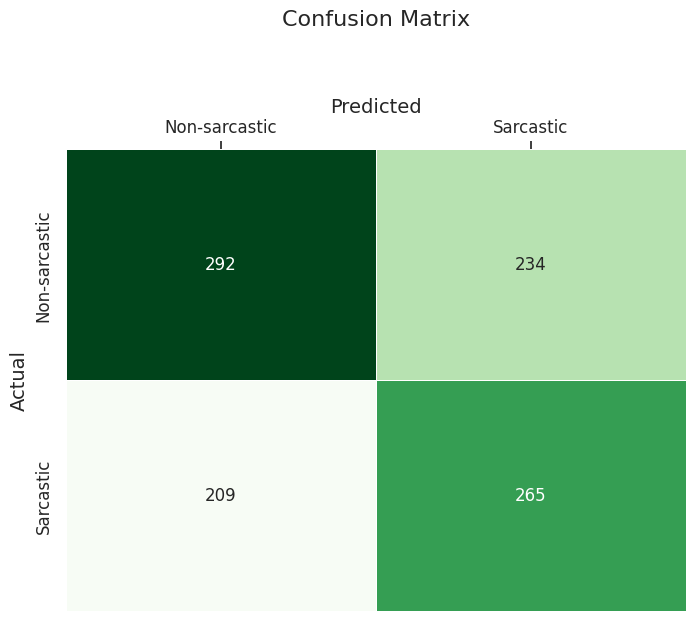

In [105]:
cm =  pd.DataFrame(cm, index=['Non-sarcastic','Sarcastic'],columns=['Non-sarcastic','Sarcastic'])
fig = plt.figure(figsize=(8,6))
ax = sns.heatmap(cm,annot=True,cbar=False, cmap='Greens',linewidths=0.5,fmt='.0f')
ax.set_title('Confusion Matrix',fontsize=16,y=1.25)
ax.set_ylabel('Actual',fontsize=14)
ax.set_xlabel('Predicted',fontsize=14)
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
ax.tick_params(labelsize=12)

In [106]:
# print ('Training Accuracies for comments with lemmatization : ')
# print ('Logistic Regression: ', accuracy_lr4)
# print ('Support Vector Machine: ', accuracy_svm4)
# print ('Multinomial Naive Bayes ', accuracy_mnb4)


In [107]:
# Y_pred = logit_classifier.predict(X_test)
# report = classification_report(Y_pred,Y_test, output_dict=True)
# report = pd.DataFrame(report).transpose()
# report = report.rename({"0": "Sarcastic Comments", "1": "Non Sarcastic Comments"})
# report

In [108]:
# #pipeline parameters
# parameters = \
# [ \
#     {
#         'clf': [MultinomialNB()],
#         'tf-idf__stop_words': ['english', None],
#         'clf__alpha': [0.001, 0.1, 1, 10, 100]
#     },

#     {
#         'clf': [SVC()],
#         'tf-idf__stop_words': ['english', None],
#         'clf__C': [0.001, 0.1, 1, 10, 100, 10e5],
#         'clf__kernel': ['linear', 'rbf'],
#         'clf__class_weight': ['balanced'],
#         'clf__probability': [True]
#     },

#     {
#         'clf': [LogisticRegression()],
#         'tf-idf__stop_words': ['english', None],
#         'clf__criterion': ['gini','entropy'],
#         'clf__splitter': ['best','random'],
#         'clf__class_weight':['balanced', None]
#     }
# ]

# #evaluating multiple classifiers
# #based on pipeline parameters
# #-------------------------------
# result=[]

# for params in parameters:

# #classifier
#     clf = params['clf'][0]

# #getting arguments by
# #popping out classifier
#     params.pop('clf')

# #pipeline
#     steps = [('tf-idf', TfidfVectorizer()), ('clf',clf)]

# #cross validation using
# #Grid Search
#     grid = GridSearchCV(Pipeline(steps), param_grid=params, cv=10)
#     grid.fit(corpus, labels)

# #storing result
#     result.append\
#     (
#         {
#             'grid': grid,
#             'classifier': grid.best_estimator_,
#             'best score': grid.best_score_,
#             'best params': grid.best_params_,
#             'cv': grid.cv
#         }
#     )   

# #sorting result by best score
# result = sorted(result, key=itemgetter('best score'),reverse=True)

# #saving best classifier
# grid = result[0]['grid']
# print(grid)

In [ ]:

#test dataset
#Y_pred = logit_classifier.predict(X_test)
